In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as sps

In [2]:
data = pd.read_csv('wine.csv', sep='\t')
features = data.iloc[:, :-1]
features['Type'] = features['Type'].map({'red': 0, 'white': 1})
features.head()
quality = data['quality'].values
data['quality'].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [3]:
X = features.values
u, d, vt = sp.linalg.svd(X, full_matrices=False)

In [ ]:
D = np.zeros((X.shape[1], X.shape[1]))
np.fill_diagonal(D, d)

In [ ]:
new_size = 2
new_d = D[:, :new_size]
new_vt = vt[:new_size, :]

In [4]:
X2 = u.dot(new_d)
X2

In [5]:
new_size = 2
new_d = D[:, :new_size]
new_vt = vt[:new_size, :]

In [6]:
X2 = u.dot(new_d)
X2

array([[ -36.67521238,    2.80422364],
       [ -72.03117993,    7.86423955],
       [ -57.00069559,    1.56332179],
       ...,
       [-115.51644075,    1.27273716],
       [-112.25224932,   -7.93412983],
       [-101.12871683,   -2.97391048]])

In [7]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=new_size)
svd.fit(X)
lib_result = svd.transform(X)
lib_result

array([[ 36.67521238,   2.80422364],
       [ 72.03117993,   7.86423955],
       [ 57.00069559,   1.56332179],
       ...,
       [115.51644075,   1.27273716],
       [112.25224932,  -7.93412983],
       [101.12871683,  -2.97391048]])

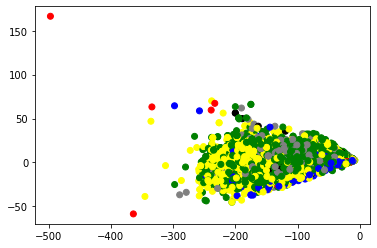

In [9]:
from matplotlib.colors import ListedColormap
colors = ListedColormap(['red', 'blue', 'yellow', 'green', 'grey', 'black', 'magenta'])

plt.scatter(X2[:, 0], X2[:, 1], c=quality,cmap=colors)

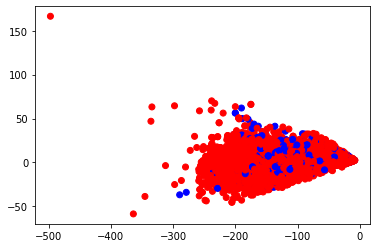

In [11]:
new_q = data['quality'].map(lambda x: 0 if x <= 6 else 1 )
colors = ListedColormap(['red', 'blue'])
plt.scatter(X2[:, 0], X2[:, 1], c=new_q,cmap=colors)
